# Spark Manipulation: SF Crime Data Analysis and Modeling

## Part 1: Import Package and Generate Spark Dataframe Object

### 1.1 Import Package

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
# Import data from SF goverment official website
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv") 
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv") 
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

path,name,size,modificationTime
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,550945238,1675130352000


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

### 1.2 Generate Spark Object

In [0]:
from pyspark.sql import SparkSession

# Generate Spark Object from CSV
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
df_opt1.createOrReplaceTempView("sf_crime")  

df_opt1_pd = df_opt1.limit(5)
df_opt1_pd = df_opt1_pd.toPandas()
df_opt1_pd.head(10)
# display(df_opt1)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,041334220,03074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,None,None,None,None,None,None,None,None,None,None
1,5118535807021,051185358,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,None,None,None,None,None,None,None,None,None,None
2,4018830907021,040188309,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,None,None,None,None,None,None,None,None,None,None
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,None,None,None,None,1,None,None,None,None,94
4,10108108004134,101081080,04134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,None,None,None,None,2,None,None,None,None,32


### 1.3 Basic Data Cleaning

In [0]:
from pyspark.sql.functions import *
##change datetype from string to Date/Month/Year

df_opt1 = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) 
df_opt1 = df_opt1.withColumn("Month", month(df_opt1['Date'])) 
df_opt1 = df_opt1.withColumn("Year", year(df_opt1['Date'])) 


df_opt1.createOrReplaceTempView("sf_crime")


df_opt1_pd = df_opt1.limit(5)
df_opt1_pd = df_opt1_pd.toPandas()
df_opt1_pd.head(10)
#display(df_opt1)


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Month,Year
0,4133422003074,041334220,03074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,None,None,None,None,None,None,None,None,11,2004
1,5118535807021,051185358,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,None,None,None,None,None,None,None,None,10,2005
2,4018830907021,040188309,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,None,None,None,None,None,None,None,None,2,2004
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,None,None,1,None,None,None,None,94,2,2011
4,10108108004134,101081080,04134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,None,None,2,None,None,None,None,32,11,2010


## Part 2: Online Analytical Processing and Problems Solving

### Q1 What are the counts of numbers of crimes for different category?

Out[80]: [Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'VEHICLE THEFT'),
 Text(5, 0, 'DRUG/NARCOTIC'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'ROBBERY'),
 Text(11, 0, 'MISSING PERSON'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES')]

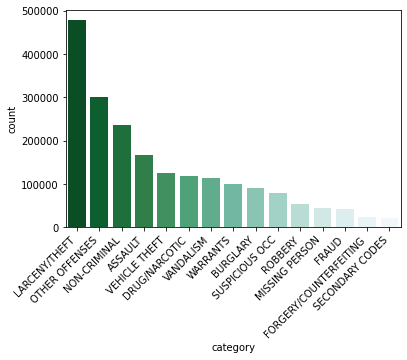

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)

q1_result_pd = q1_result.limit(15).toPandas()

q1_result_chart = sns.barplot(x='category', y = 'count', palette = 'BuGn_r', data = q1_result_pd)
q1_result_chart.set_xticklabels(q1_result_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#display(q1_result_pd)

Out[82]: <AxesSubplot:xlabel='category', ylabel='Count'>

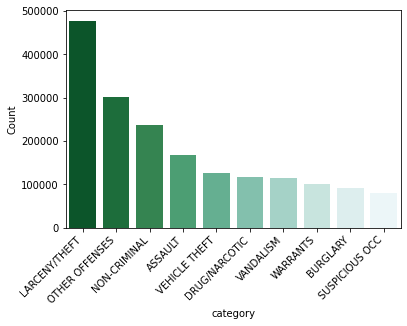

In [0]:
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")

crimeCategory_pd = crimeCategory.limit(10).toPandas()
crimeCategory_chart = sns.barplot(x='category', y = 'Count', palette = 'BuGn_r', data = crimeCategory_pd)
crimeCategory_chart.set_xticklabels(crimeCategory_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
crimeCategory_chart

Out[50]: [Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'VEHICLE THEFT'),
 Text(5, 0, 'DRUG/NARCOTIC'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'ROBBERY'),
 Text(11, 0, 'MISSING PERSON'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'TRESPASS'),
 Text(17, 0, 'PROSTITUTION'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'DISORDERLY CONDUCT'),
 Text(20, 0, 'DRUNKENNESS'),
 Text(21, 0, 'SEX OFFENSES, FORCIBLE'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(24, 0, 'KIDNAPPING'),
 Text(25, 0, 'ARSON'),
 Text(26, 0, 'EMBEZZLEMENT'),
 Text(27, 0, 'LIQUOR LAWS'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'SUICIDE'),
 Text(30, 0, 'BAD CHECKS'),
 Text(31, 0, 'BRIBERY'),
 Text(32, 0, 'EXTORTION'),
 Text(33, 0,

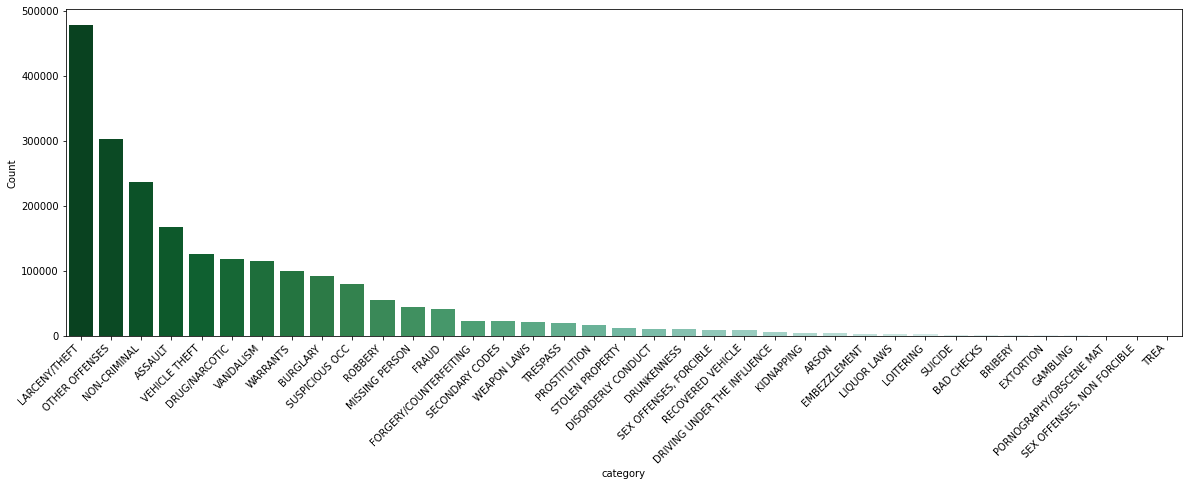

In [0]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 

import seaborn as sns
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
crimes_pd_df = crimeCategory.toPandas() 
chart = sns.barplot(x = 'category', y = 'Count', palette= 'BuGn_r',data = crimes_pd_df )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

The top 3 categories with the highest number of counts are Larceny/theft, Other offenses, Non-Criminal.

Gambling, pornography/obscene mat and trea are the three crime types with the least number of crime counts.

### Q2 Counts the number of crimes for different district, and visualize your results

PdDistrict,Counts
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


Output can only be rendered in Databricks

Out[86]: <AxesSubplot:xlabel='category', ylabel='Count'>

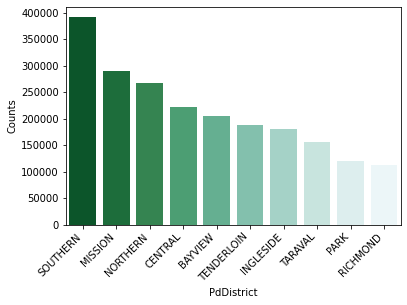

In [0]:
# SQL Way
crimedistrict=spark.sql("select PdDistrict, count(*) as Counts from sf_crime group by PdDistrict order by Counts Desc")

crimedistrict_pd = crimedistrict.limit(10).toPandas()
crimedistrict_chart = sns.barplot(x='PdDistrict', y = 'Counts', palette = 'BuGn_r', data = crimedistrict_pd)
crimedistrict_chart.set_xticklabels(crimedistrict_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
crimeCategory_chart

Out[91]: <AxesSubplot:xlabel='category', ylabel='Count'>

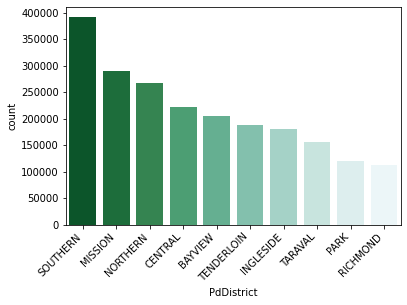

In [0]:
# DF way
crimedistrict=df_opt1.groupBy('PdDistrict').count().orderBy('Count',ascending=False)

crimedistrict_pd = crimedistrict.limit(10).toPandas()
crimedistrict_chart = sns.barplot(x='PdDistrict', y = 'count', palette = 'BuGn_r', data = crimedistrict_pd)
crimedistrict_chart.set_xticklabels(crimedistrict_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
crimeCategory_chart

### Q3 Count the number of crimes each "Sunday" at "SF downtown"

SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range.

In [0]:
# SQL Way
crime_sunday_SFdown=spark.sql("select Date,count(*) as Counts from sf_crime where (X>-122.4313 and X<-122.4213) and (Y>37.7540 and Y<37.7740) and DayOfWeek='Sunday' group by 1 order by 1")
display(crime_sunday_SFdown)

Date,Counts
2003-01-05,13
2003-01-12,20
2003-01-19,17
2003-01-26,13
2003-02-02,14
2003-02-09,22
2003-02-16,12
2003-02-23,14
2003-03-02,16
2003-03-09,8


In [0]:
# DF Way
crime_sunday_SFdown=df_opt1.filter((df_opt1.X > -122.4313) & (df_opt1.X < -122.4213) & (df_opt1.Y < 37.7740) & (df_opt1.Y > 37.7540 )&(df_opt1.DayOfWeek == "Sunday")).groupby('Date','DayOfWeek').count().orderBy('Date')
display(crime_sunday_SFdown)

Date,DayOfWeek,count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


### Q4 Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
#SQL way
crime_each_month=spark.sql("select substring(Date,1,4) as Years,substring(Date,6,2) as Months,count(*) as counts from sf_crime where (Date>='2015-01-01' and Date<='2018-12-31') group by 1,2 order by 1,2")
display(crime_each_month)

Years,Months,counts
2015,01,13181
2015,02,11882
2015,03,13463
2015,04,12526
2015,05,13318
2015,06,12853
2015,07,12949
2015,08,13317
2015,09,12476
2015,10,12697


Output can only be rendered in Databricks

In [0]:
%sql select substring(Date,1,4) as Years,substring(Date,6,2) as Months,count(*) as counts from sf_crime where (Date>='2015-01-01' and Date<='2018-12-31') group by 1,2 order by 1,2

Years,Months,counts
2015,01,13181
2015,02,11882
2015,03,13463
2015,04,12526
2015,05,13318
2015,06,12853
2015,07,12949
2015,08,13317
2015,09,12476
2015,10,12697


In [0]:
#DF way
crime_category=df_opt1[df_opt1.Year.isin([2015,2016,2017,2018])].groupBy('Year','Category').count().orderBy('Year','Category',ascending=True)
display(crime_category)

Year,Category,count
2015,ARSON,309
2015,ASSAULT,11090
2015,BAD CHECKS,38
2015,BRIBERY,73
2015,BURGLARY,5903
2015,DISORDERLY CONDUCT,547
2015,DRIVING UNDER THE INFLUENCE,428
2015,DRUG/NARCOTIC,4194
2015,DRUNKENNESS,576
2015,EMBEZZLEMENT,183


Output can only be rendered in Databricks

In [0]:
#DF way
crime_each_month=df_opt1[df_opt1.Year.isin([2015,2016,2017,2018])].groupBy('Year','Month').count().orderBy('Year','Month',ascending=True)
display(crime_each_month)



Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


### Q5 Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import to_timestamp

# add new columns to convert Time to hour format
df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1['Time'],'HH:mm')) 

# extract hour from incident time
df_opt1 = df_opt1.withColumn('Hour',hour(df_opt1['Time']))
#display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")  

In [0]:
#DF way
crime_category=df_opt1[df_opt1.Date.isin(['2015-12-15','2016-12-15','2017-12-15'])].groupBy('Date','Hour').count().orderBy('Date','Hour',ascending=True)
display(crime_category)

Date,Hour,count
2015-12-15,0,15
2015-12-15,1,6
2015-12-15,2,5
2015-12-15,3,4
2015-12-15,4,10
2015-12-15,5,3
2015-12-15,6,4
2015-12-15,7,8
2015-12-15,8,12
2015-12-15,9,10


In [0]:
#SQL Way
crime_category=spark.sql("""
select Date,Hour,count(*) as counts 
from sf_crime 
where (Date='2015-12-15' or Date='2016-12-15' or Date='2017-12-15') 
group by 1,2 
order by 1,2""")
display(crime_category)


Date,Hour,counts
2015-12-15,0,15
2015-12-15,1,6
2015-12-15,2,5
2015-12-15,3,4
2015-12-15,4,10
2015-12-15,5,3
2015-12-15,6,4
2015-12-15,7,8
2015-12-15,8,12
2015-12-15,9,10


It can be clearly seen from the above figure that there are two peak periods of crime, 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest. So remind visitors not to relax their vigilance while resting.

### Q6 Find out the top-3 danger district, Find out the crime event w.r.t category and time (hour) from the result of step 1 and give your advice to distribute the police based on your analysis results.

In [0]:
#SQL Way
top_3_district=spark.sql("select PdDistrict, count(*) as Counts from sf_crime group by PdDistrict order by Counts Desc limit 3")
display(top_3_district)

PdDistrict,Counts
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
#DF Way
category_time_top3=df_opt1[df_opt1.PdDistrict.isin(['MISSION','NORTHERN','SOUTHERN'])].groupBy('Hour','category').count().orderBy('Hour','category',ascending=True)
display(category_time_top3)

Hour,category,count
0,ARSON,84
0,ASSAULT,4120
0,BAD CHECKS,79
0,BRIBERY,20
0,BURGLARY,1585
0,DISORDERLY CONDUCT,301
0,DRIVING UNDER THE INFLUENCE,272
0,DRUG/NARCOTIC,1756
0,DRUNKENNESS,400
0,EMBEZZLEMENT,280


In [0]:
#SQL Way
category_time_top3=spark.sql("""
select Category,Hour,count(*) as counts
from sf_crime
where PdDistrict in ('SOUTHERN', 'MISSION', 'NORTHERN')
group by 1,2
order by 1,2""")
display(category_time_top3)

Category,Hour,counts
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


Insights
1. The top three dangerous districts in SF are 'SOUTHERN','MISSION','NORTHERN'
2. The number of crime reaches the lowest point around 5 and increases to the submit at 18.
3. The suggestion is to assign more resource and polices for time slots between 17-19

### Q7 For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
# DF Way
category_resolution=df_opt1.filter(df_opt1['resolution']!='NONE').groupBy('category','resolution').count().orderBy('count',ascending=False)
display(category_resolution)

category,resolution,count
OTHER OFFENSES,"ARREST, BOOKED",115427
DRUG/NARCOTIC,"ARREST, BOOKED",97926
OTHER OFFENSES,"ARREST, CITED",94817
WARRANTS,"ARREST, BOOKED",93092
ASSAULT,"ARREST, BOOKED",49246
NON-CRIMINAL,PSYCHOPATHIC CASE,27027
LARCENY/THEFT,"ARREST, BOOKED",25136
MISSING PERSON,LOCATED,19615
WEAPON LAWS,"ARREST, BOOKED",13334
BURGLARY,"ARREST, BOOKED",12765


In [0]:
# SQL Way
category_resolution=spark.sql("""
select category,resolution,count(*) as counts
from sf_crime
where resolution!='NONE'
group by 1,2
order by 3 desc
""")
display(category_resolution)

category,resolution,counts
OTHER OFFENSES,"ARREST, BOOKED",115427
DRUG/NARCOTIC,"ARREST, BOOKED",97926
OTHER OFFENSES,"ARREST, CITED",94817
WARRANTS,"ARREST, BOOKED",93092
ASSAULT,"ARREST, BOOKED",49246
NON-CRIMINAL,PSYCHOPATHIC CASE,27027
LARCENY/THEFT,"ARREST, BOOKED",25136
MISSING PERSON,LOCATED,19615
WEAPON LAWS,"ARREST, BOOKED",13334
BURGLARY,"ARREST, BOOKED",12765


The top 3 categories with the highest resolved rate are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE.
The top 3 categories with the lowest resolved rate are RECOVERED VEHICLE, VEHICLE THEFT, LARCENY/THEFT.
THe more police force should be assigned to RECOVERED VEHICLE, VEHICLE THEFT, LARCENY/THEFT.